# What you will learn

- how to apply supervised learning techniques
- splitting the data into train and test
- validating model performance using accuracy measures
- applying cross-validation techniques

In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("max_colwidth", None)

df = pd.read_csv("data/eclipse_jdt.csv.gz")
print(df.columns)

Index(['Issue_id', 'Priority', 'Component', 'Duplicated_issue', 'Title',
       'Description', 'Status', 'Resolution', 'Version', 'Created_time',
       'Resolved_time'],
      dtype='object')


In [2]:
df[["Issue_id", "Priority", "Component", "Title", "Description"]].sample(2)

,Issue_id,Priority,Component,Title,Description
4699,12525,P1,UI,NPE in extract method,in junit.awtui.TestRunner in the method createUI try to extract the ; following range:; ; ; \t\tPanel numbersPanel= <START>new Panel(new FlowLayout());; \t\tnumbersPanel.add(new Label(Runs:));\t\t; \tnumbersPanel.add(fNumberOfRuns);; \t\tnumbersPanel.add(new Label( Errors:));\t; \tnumbersPanel.add(fNumberOfErrors);; \t\tnumbersPanel.add(new Label( Failures:));\tnumbersPanel.add; (fNumberOfFailures); <END>; ; You get a walkback:; java.lang.NullPointerException; \tat ; org.eclipse.jdt.internal.corext.dom.SelectionAnalyzer.handleNextSelectedNode; (SelectionAnalyzer.java:97); \tat ; org.eclipse.jdt.internal.corext.refactoring.code.ExtractMethodAnalyzer.handleNex; tSelectedNode(ExtractMethodAnalyzer.java:384); \tat org.eclipse.jdt.internal.corext.dom.SelectionAnalyzer.visitNode; (SelectionAnalyzer.java:73); \tat org.eclipse.jdt.internal.corext.dom.GenericVisitor.visit; (GenericVisitor.java:83); \tat org.eclipse.jdt.core.dom.ExpressionStatement.accept0; (ExpressionStatement.java:71); \tat org.eclipse.jdt.core.dom.ASTNode.acceptChildren(ASTNode.java:986); \tat org.eclipse.jdt.core.dom.Block.accept0(Block.java:73); \tat org.eclipse.jdt.core.dom.ASTNode.acceptChild(ASTNode.java:957); \tat org.eclipse.jdt.core.dom.MethodDeclaration.accept0; (MethodDeclaration.java:173); \tat org.eclipse.jdt.core.dom.ASTNode.acceptChildren(ASTNode.java:986); \tat org.eclipse.jdt.core.dom.TypeDeclaration.accept0; (TypeDeclaration.java:153); \tat org.eclipse.jdt.core.dom.ASTNode.acceptChildren(ASTNode.java:986); \tat org.eclipse.jdt.core.dom.CompilationUnit.accept0; (CompilationUnit.java:138); \tat org.eclipse.jdt.core.dom.ASTNode.accept(ASTNode.java:906); \tat ; org.eclipse.jdt.internal.corext.refactoring.code.ExtractMethodRefactoring.checkA; ctivation(ExtractMethodRefactoring.java:161); \tat ; org.eclipse.jdt.internal.ui.refactoring.actions.RefactoringStarter.activate; (RefactoringStarter.java:74); \tat ; org.eclipse.jdt.internal.ui.refactoring.actions.TextSelectionBasedRefactoringAct; ion.run(TextSelectionBasedRefactoringAction.java:28); \tat ; org.eclipse.jdt.internal.ui.refactoring.actions.TextSelectionAction.run; (TextSelectionAction.java:80); \tat org.eclipse.ui.internal.PluginAction.runWithEvent; (PluginAction.java:204); \tat org.eclipse.jface.action.ActionContributionItem.handleWidgetSelection; (ActionContributionItem.java:407); \tat org.eclipse.jface.action.ActionContributionItem.handleWidgetEvent; (ActionContributionItem.java(Compiled Code)); \tat ; org.eclipse.jface.action.ActionContributionItem$ActionListener.handleEvent; (ActionContributionItem.java(Compiled Code)); \tat ; org.eclipse.jface.action.ActionContributionItem$ActionListener.handleEvent; (ActionContributionItem.java(Compiled Code)); \tat org.eclipse.swt.widgets.EventTable.sendEvent(EventTable.java; (Compiled Code)); \tat org.eclipse.swt.widgets.Widget.notifyListeners(Widget.java(Compiled ; Code)); \tat org.eclipse.swt.widgets.Display.runDeferredEvents(Display.java; (Compiled Code)); \tat org.eclipse.swt.widgets.Display.readAndDispatch(Display.java; (Compiled Code)); \tat org.eclipse.ui.internal.Workbench.runEventLoop(Workbench.java; (Compiled Code)); \tat org.eclipse.ui.internal.Workbench.run(Workbench.java:705); \tat org.eclipse.core.internal.boot.InternalBootLoader.run; (InternalBootLoader.java:777); \tat org.eclipse.core.boot.BootLoader.run(BootLoader.java:319); \tat java.lang.reflect.Method.invoke(Native Method); \tat org.eclipse.core.launcher.Main.basicRun(Main.java:196); \tat org.eclipse.core.launcher.Main.run(Main.java:555); \tat org.eclipse.core.launcher.UIMain.main(UIMain.java:52)
24679,87521,P3,UI,[quick fix] Automate remove unneccesary cast operation,Please add a feature to automatically remove all unnecessary casts in an entire; project. Sometimes there are thousands of them and it takes a long time to do; each on individually.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45296 entries, 0 to 45295
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Issue_id          45296 non-null  int64  
 1   Priority          45296 non-null  object 
 2   Component         45296 non-null  object 
 3   Duplicated_issue  7688 non-null   float64
 4   Title             45296 non-null  object 
 5   Description       45253 non-null  object 
 6   Status            45296 non-null  object 
 7   Resolution        45296 non-null  object 
 8   Version           45296 non-null  object 
 9   Created_time      45296 non-null  object 
 10  Resolved_time     45296 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.8+ MB


In [4]:
df.describe()

,Issue_id,Duplicated_issue
count,45296.000000,7688.000000
mean,115382.154097,95391.218132
std,109016.589026,94600.431707
min,1518.000000,10.000000
25%,31741.000000,28330.750000
50%,78303.500000,63564.000000
75%,166469.000000,131405.000000
max,424785.000000,424403.000000


In [5]:
df.isna().sum()

Issue_id                0
Priority                0
Component               0
Duplicated_issue    37608
Title                   0
Description            43
Status                  0
Resolution              0
Version                 0
Created_time            0
Resolved_time           0
dtype: int64

- issue id: The primary key for the issued used to track the bug
- priority: this varies from P1 (most critical) to P5 (least critical) and defines the severity of the bug (a categorical field)
- component: this refers to specific architectural part of the project where the bug occurs. This could be UI, the APT etc (a categorical field)
- title: this is a short summary entered by the user that briefly describes the bug (a full text field)
- description: this is a more detailed description of the software behaviour that produces the bug and it's impact on the usage (a full text field)

In [6]:
df.dtypes

Issue_id              int64
Priority             object
Component            object
Duplicated_issue    float64
Title                object
Description          object
Status               object
Resolution           object
Version              object
Created_time         object
Resolved_time        object
dtype: object

In [7]:
df.nunique()

Issue_id            45296
Priority                5
Component               6
Duplicated_issue     4894
Title               44811
Description         44663
Status                  3
Resolution              7
Version                40
Created_time        43239
Resolved_time       42754
dtype: int64

In [8]:
df.sample(1).T

,4419
Issue_id,11789
Priority,P2
Component,UI
Duplicated_issue,NaN
Title,clipboard based copying of java resources - inconsistent paste targets
Description,projects:; target position is always a child of the (invisible) root;; no matter what was selected; ; other resources:; target position is child of selected root; ; Explorer pastes resources as neighbours -> I can hit CTRL-C; CTRL-V in a row; and have a new copy; w/o needing to select the parent resource.
Status,RESOLVED
Resolution,FIXED
Version,2.0
Created_time,2002-03-20 05:17:00 -0500


<AxesSubplot:>

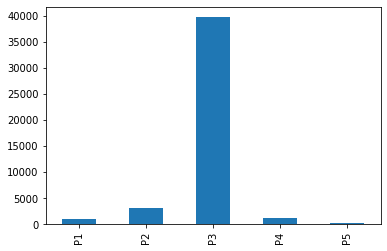

In [9]:
df["Priority"].value_counts().sort_index().plot(kind="bar")

In [10]:
df["Component"].value_counts()

UI       17479
Core     13669
Debug     7542
Text      5901
APT        406
Doc        299
Name: Component, dtype: int64

### Blueprint: Building a Text Classification System

**Step 1: Data Preparation**

In [11]:
df = df[["Title", "Description", "Priority"]]
df = df.dropna()
df["text"] = df["Title"] + " " + df["Description"]
df = df.drop(columns=["Title", "Description"])
df.columns

Index(['Priority', 'text'], dtype='object')

In [12]:
%run preprocess.py

df["text"] = df["text"].map(clean)
df = df[df["text"].str.len() > 50]
df.sample(2)

,Priority,text
16632,P3,WIBNI there was a parameter warning class too specific When a parameter is passed to a method; it would be nice to be warned if the ; methods used on the parameter object were checked and a warning generated that ; the class is too specific. For example; if a parameter fred is declared as ; ArrayList and only the method iterator is called then the warning; The ArrayList argument fred may be replaced by more general base class ; Collection or some such.
41045,P3,Built-in compiler wont compile DocumentBuilderFactory.setXIncludeAware The following program does not compile inside eclipse. dbf.setXIncludeAware fails. Outside eclipse I can compile with no problem. Im using IBM Java 1.6 SR7 on Centos 5.4 x86_64 to run eclipse and have no other JVMs. Eclipse is running under this jvm; ; import javax.xml.parsers.*;; public class junk {; public void foo() {; javax.xml.parsers.DocumentBuilderFactory dbf = DocumentBuilderFactory.newInstance();; dbf.setXIncludeAware(true);; }; }; ; ; ; Configuration Details --; Product: Eclipse 1.2.2.20100122-1337 (org.eclipse.epp.package.java.product); Installed Features:; org.eclipse.jdt 3.5.2.r352_v20100108-7r88FEwFI0WTuoBl0iaG0tyhfZH6


**Step 2: Train-test split**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["Priority"], test_size=0.2, random_state=42, stratify=df["Priority"]
)
print("Size of training data:", X_train.shape[0])
print("Size of test data:", X_test.shape[0])

Size of training data: 36040
Size of test data: 9011


**Step 3: Training the Machine Learning Model**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

In [16]:
from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, y_train)

LinearSVC(random_state=0, tol=1e-05)

**Step 4: Model Evaluation**

In [23]:
from sklearn.metrics import accuracy_score

X_test_tf = tfidf.transform(X_test)
y_pred = model1.predict(X_test_tf)

print("Accuracy score -", accuracy_score(y_test, y_pred))

Accuracy score - 0.8761513705471091


In [27]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy="most_frequent")
clf.fit(X_train, y_train)

y_pred_baseline = clf.predict(X_test)
print("Accuracy score -", accuracy_score(y_test, y_pred_baseline))

Accuracy score - 0.8769281988680502


In [29]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix(y_test, y_pred)

array([[  19,    1,  199,    4,    0],
       [   6,   18,  576,    8,    0],
       [   8,   48, 7827,   19,    0],
       [   0,    5,  192,   31,    0],
       [   0,    0,   50,    0,    0]])

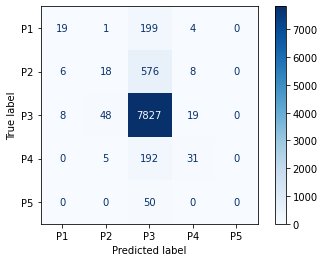

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline

plot_confusion_matrix(model1, X_test_tf, y_test, values_format="d", cmap=plt.cm.Blues)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          P1       0.58      0.09      0.15       223
          P2       0.25      0.03      0.05       608
          P3       0.89      0.99      0.93      7902
          P4       0.50      0.14      0.21       228
          P5       0.00      0.00      0.00        50

    accuracy                           0.88      9011
   macro avg       0.44      0.25      0.27      9011
weighted avg       0.82      0.88      0.83      9011



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# There are some labels in y_test that is not in y_pred, causing the error above.
# That means that there are no F-score calculated for this label.
set(y_test) - set(y_pred)

{'P5'}

In [38]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

          P1       0.58      0.09      0.15       223
          P2       0.25      0.03      0.05       608
          P3       0.89      0.99      0.93      7902
          P4       0.50      0.14      0.21       228
          P5       0.00      0.00      0.00        50

    accuracy                           0.88      9011
   macro avg       0.44      0.25      0.27      9011
weighted avg       0.82      0.88      0.83      9011



**Class Imbalance**

In [42]:
# We have to many P3.
# df.groupby("Priority").count()
df["Priority"].value_counts()

P3    39506
P2     3038
P4     1138
P1     1117
P5      252
Name: Priority, dtype: int64

In [43]:
# Filter bug reports with priority P3 and sample 4000 rows from it.
df_sample_p3 = df[df["Priority"] == "P3"].sample(n=4000)

# Create a separate DataFrame containing all other bug reports.
df_sample_rest = df[df["Priority"] != "P3"]

# Concatenate the two DataFrame to create the new balanced bug reports dataset.
df_balanced = pd.concat([df_sample_rest, df_sample_p3])

# Check the status of the class imbalance.
df_balanced["Priority"].value_counts()

P3    4000
P2    3038
P4    1138
P1    1117
P5     252
Name: Priority, dtype: int64

### Final Blueprint for Text Classification

In [45]:
# Loading the balanced DataFrame.
df = df_balanced[["text", "Priority"]]
df = df.dropna()

# Step 1 - Data Preparation.
df["text"] = df["text"].apply(clean)

# Step 2 - Train-Test Split.
X_train, X_test, y_train, y_test = train_test_split(
    df["text"],
    df["Priority"],
    test_size=0.2,
    random_state=42,
    stratify=df["Priority"],
)

print("Size of training data", X_train.shape[0])
print("Size of test data", X_test.shape[0])

Size of training data 7636
Size of test data 1909


In [46]:
tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

In [47]:
model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, y_train)

# Step 4 - Model Evaluation.

X_test_tf = tfidf.transform(X_test)
y_pred = model1.predict(X_test_tf)
print("Accuracy Score -", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score - 0.4934520691461498
              precision    recall  f1-score   support

          P1       0.41      0.27      0.33       223
          P2       0.43      0.47      0.45       608
          P3       0.56      0.64      0.60       800
          P4       0.47      0.36      0.41       228
          P5       0.00      0.00      0.00        50

    accuracy                           0.49      1909
   macro avg       0.37      0.35      0.36      1909
weighted avg       0.48      0.49      0.48      1909



In [48]:
clf = DummyClassifier(strategy="stratified")
clf.fit(X_train, y_train)

y_pred_baseline = clf.predict(X_test)
print("Accuracy score -", accuracy_score(y_test, y_pred_baseline))

Accuracy score - 0.2964903090623363


In [49]:
# Cases for correct predictions.
frame = {"text": X_test, "actual": y_test, "predicted": y_pred}

result = pd.DataFrame(frame)


result[
    ((result["actual"] == "P1") | (result["actual"] == "P2"))
    & (result["actual"] == result["predicted"])
].sample(2)

text actual predicted
6071                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [50]:
result[
    ((result["actual"] == "P1") | (result["actual"] == "P2"))
    & (result["actual"] != result["predicted"])
].sample(2)

text actual predicted
1411                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

### Blueprint: Using Cross-validations to Estimate Realistic Accuracy Metrics

Using a cross-validation technique allows us to use all observations, and we do not need to create a separate hold-out test split. This gives the model more data to learn from.

In [52]:
from sklearn.model_selection import cross_val_score

# Vectorization

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
dt_tf = tfidf.fit_transform(df["text"]).toarray()

# Cross validation with 5 folds.
scores = cross_val_score(estimator=model1, X=dt_tf, y=df["Priority"], cv=5)

print("Validation scores from each iteration of the cross validations", scores)
print("Mean value across of validation scores", scores.mean())
print("Standard deviation of validation scores", scores.std())

Validation scores from each iteration of the cross validations [0.48821372 0.44735464 0.44264013 0.42325825 0.37244631]
Mean value across of validation scores 0.43478260869565216
Standard deviation of validation scores 0.03766511893608705


### Blueprint: Performing hyperparameter tuning with Grid Search

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

training_pipeline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer(stop_words="english")),
        ("model", LinearSVC(random_state=42, tol=1e-5)),
    ]
)

grid_param = [
    {
        "tfidf__min_df": [5, 10],
        "tfidf__ngram_range": [(1, 3), (1, 6)],
        "model__penalty": ["l2"],
        "model__loss": ["hinge"],
        "model__max_iter": [10000],
    },
    {
        "tfidf__min_df": [5, 10],
        "tfidf__ngram_range": [(1, 3), (1, 6)],
        "model__penalty": ["l2"],
        "model__C": [1, 10],
        "model__tol": [1e-2, 1e-3],
    },
]

grid_search_processor = GridSearchCV(
    estimator=training_pipeline,
    param_grid=grid_param,
    cv=5,
    verbose=2,  # Print progress.
    # n_jobs=-1,
)
grid_search_processor.fit(df["text"], df["Priority"])

best_params = grid_search_processor.best_params_
print("Best alpha parameter identified by grid search", best_params)

best_result = grid_search_processor.best_score_
print("Best result identified by grid search", best_result)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END model__loss=hinge, model__max_iter=10000, model__penalty=l2, tfidf__min_df=5, tfidf__ngram_range=(1, 3); total time=   5.7s
[CV] END model__loss=hinge, model__max_iter=10000, model__penalty=l2, tfidf__min_df=5, tfidf__ngram_range=(1, 3); total time=   4.7s
[CV] END model__loss=hinge, model__max_iter=10000, model__penalty=l2, tfidf__min_df=5, tfidf__ngram_range=(1, 3); total time=   5.4s
[CV] END model__loss=hinge, model__max_iter=10000, model__penalty=l2, tfidf__min_df=5, tfidf__ngram_range=(1, 3); total time=   6.9s


KeyboardInterrupt: 

In [ ]:
grid_search_results = pd.DataFrame(grid_search_processor.cv_results)
grid_search_results[["rank_test_score", "mean_test_score", "params"]].sort_values(
    by=["rank_test_score"]
)[:5]